<h1> 1.0 Business Understanding </h1>

This is a dataset of approximately 4300 images of flowers. These images have been scrapped off of Flickr, Google, and Yandax and are divided into five categories, dasies, dandelions, roses, sunflowers, and tulips.  The images are in standard definition quality and do not have a standardized size. According to the kaggle page, the data was collected to answer the question, “What kind of flower is that?” The creator also includes a prediction task for the data on kaggle, “You can use this dataset to recognize plants from the photo.” 

A flower identification tool would be useful for landscapers for several reasons. It could help them identify potential weeds that must be removed from gardens. It could also help them identify a flower so the landscaper can determine the best care instructions for the flower. It can even help a landscaper identify dangerous flowers he should avoid directly handling.

Another plant photo identification tool already exists in the market, Plantsnap. According to the Plantsnap website, it boast a 96% success rate. In order for our tool to be considered viable, it must have at least, if not greater than, a 96% success rate.  

<hr>
Kaggle dataset: https://www.kaggle.com/alxmamaev/flowers-recognition <br>
Plantsnap self reported success rate: https://plantsnap.com/faq/

<h1>2.0 Data Preparation </h1>

We begin by opening all images inside of the flowers folder as numpy arrays. 


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import glob
import pickle
from PIL import Image
from matplotlib.pyplot import imshow
from IPython.display import display
import cv2
#use glob to get all file names in each folder
daisyFiles = glob.glob("flowers/daisy/*")
dandelionFiles = glob.glob("flowers/dandelion/*")
roseFiles = glob.glob("flowers/rose/*")
sunflowerFiles = glob.glob("flowers/sunflower/*")
tulipFiles = glob.glob("flowers/tulip/*")

daisies = []
dandelions = []
roses = []
sunflowers = []
tulips = []
#function to take image name, open image as numpy array and add to list
def addImageToArray(imageFileArray, imageArray):
    for file in imageFileArray:
        imageArray.append(np.asarray(Image.open(file)))
        
addImageToArray(daisyFiles,daisies)
addImageToArray(dandelionFiles,dandelions)
addImageToArray(roseFiles,roses)
addImageToArray(sunflowerFiles,sunflowers)
addImageToArray(tulipFiles,tulips)



After this, we will greyscale the image. First we will load in several of the images fully colored, then their greyscale equivalents. To greyscale the image, we will be using the equation presented in class, .3 R + .59 G  + .11 B, to modify the RGB values.


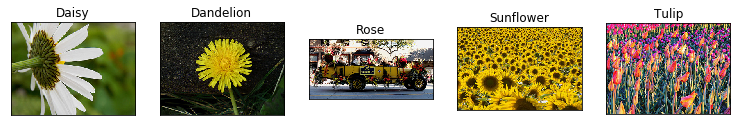

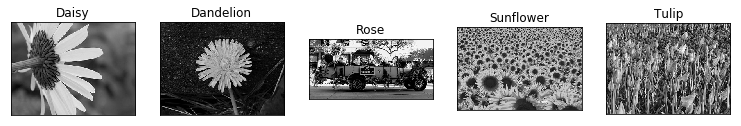

In [5]:
def displayImagesForTransform(images, titles):
    plt.figure(figsize=(1.7 * 6, 2.3 * 3))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(1 * 5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

displayImages = [Image.fromarray(daisies[0].astype('uint8'), 'RGB'),Image.fromarray(dandelions[0].astype('uint8'), 'RGB'),
                Image.fromarray(roses[0].astype('uint8'), 'RGB'), Image.fromarray(sunflowers[0].astype('uint8'), 'RGB'),
                 Image.fromarray(tulips[0].astype('uint8'), 'RGB')]
titles = ['Daisy','Dandelion','Rose','Sunflower','Tulip']
displayImagesForTransform(displayImages, titles)
def convertToGrayScale(RGBArray):
    return np.dot(RGBArray[...,:3], [0.3, 0.59, 0.11])
def convertAllImagesToGrey(ImageArray):
    for i in range (0, len(ImageArray)):
        ImageArray[i] = convertToGrayScale(ImageArray[i])
convertAllImagesToGrey(daisies)
convertAllImagesToGrey(dandelions)
convertAllImagesToGrey(roses)
convertAllImagesToGrey(sunflowers)
convertAllImagesToGrey(tulips)


displayImages = [Image.fromarray(daisies[0].astype('uint8'), mode='L'), Image.fromarray(dandelions[0].astype('uint8'), mode='L'),
                Image.fromarray(roses[0].astype('uint8'), mode='L'),Image.fromarray(sunflowers[0].astype('uint8'), mode='L'),
                Image.fromarray(tulips[0].astype('uint8'), mode='L')]
displayImagesForTransform(displayImages, titles)

Next, we will resize the images to make all of them uniform. We will accomplish this by first finding the lowest average image size.


In [6]:

def averageImageSize(imageArray):
    imgx = 0
    imgy = 0
    for img in imageArray:
        imgx += img.shape[0]
        imgy += img.shape[1]
    imgx /= len(imageArray)
    imgy /= len(imageArray)
    print(int(imgx),  " X ",  int(imgy))
print("\nDaisy Size:")
averageImageSize(daisies)
print("\nDandelion Size:")
averageImageSize(dandelions)
print("\nRose Size:")
averageImageSize(roses)
print("\nSunflower Size:")
averageImageSize(sunflowers)
print("\nTulip Size:")
averageImageSize(tulips)



Daisy Size:
252  X  331

Dandelion Size:
258  X  346

Rose Size:
244  X  327

Sunflower Size:
261  X  348

Tulip Size:
248  X  336


After this, we will convert the numpy matricies back into python images and use the python image’s built in crop feature to make them all the same size, deleting any images smaller than the average size of 244 x 327 taken from the rose image set. Next, we will convert the numpy matrices back into python images and use the python image’s built in crop feature to make them all the same size, deleting any images smaller than the average size of 244 x 327 taken from the rose image set. We will conclude by ensuring all matrices have an average uniform size of 330 x 550.


In [7]:
def matrixResize(arrayToAlter):
    croppedImages = []
    for i in range(0, len(arrayToAlter)):
        if(arrayToAlter[i].shape[0] >= 244 and arrayToAlter[i].shape[1] >= 327):
            #reload the matrix as an image
            image = Image.fromarray(arrayToAlter[i].astype('uint8'), mode='L')
            #crop the image by our calculations
            image.crop((0,0,244,327))
            #convert the image back into a matrix
            n = np.asarray(image)
            #final resize to ensure all matricies are the same size and remove any extra data from converting
            croppedImages.append( np.resize(n, (330,500)))
    return croppedImages

croppedDaisies = matrixResize(daisies)    

croppedDandelions = matrixResize(dandelions)    

croppedRoses = matrixResize(roses)    

croppedSunflowers = matrixResize(sunflowers)    

croppedTulips = matrixResize(tulips)    
print("Total Images:")
print(len(croppedDaisies)+len(croppedDandelions) +len(croppedRoses) + len(croppedSunflowers) 
      + len(croppedTulips))

print("\nDaisy Size:")
averageImageSize(croppedDaisies)
print("\nDandelion Size:")
averageImageSize(croppedDandelions)
print("\nRose Size:")
averageImageSize(croppedRoses)
print("\nSunflower Size:")
averageImageSize(croppedSunflowers)
print("\nTulip Size:")
averageImageSize(croppedTulips)


Total Images:
1305

Daisy Size:
330  X  500

Dandelion Size:
330  X  500

Rose Size:
330  X  500

Sunflower Size:
330  X  500

Tulip Size:
330  X  500



Here are several of the images after the crop and resize:

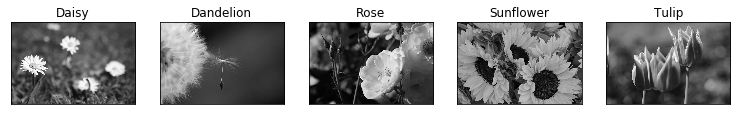

In [8]:
displayImages = [Image.fromarray(croppedDaisies[0].astype('uint8'), mode='L'), Image.fromarray(croppedDandelions[0].astype('uint8'), mode='L'),
                Image.fromarray(croppedRoses[0].astype('uint8'), mode='L'),Image.fromarray(croppedSunflowers[0].astype('uint8'), mode='L'),
                Image.fromarray(croppedTulips[0].astype('uint8'), mode='L')]
displayImagesForTransform(displayImages, titles)

Finally, we will linearize the matrices to make them one dimensional. 


In [9]:
def flattenMatrix(arrayOfMatracies):
    flattenedArray = []
    for m in arrayOfMatracies:
        flattenedArray.append(m.flatten())
        
    return flattenedArray
flatDaisy = flattenMatrix(croppedDaisies)
flatTulip = flattenMatrix(croppedTulips)
flatDandelions = flattenMatrix(croppedDandelions)
flatRoses = flattenMatrix(croppedRoses)
flatSunflowers = flattenMatrix(croppedSunflowers)
#combine the lists together
X = flatDaisy + flatTulip + flatDandelions + flatRoses + flatSunflowers
#example matrix to show only one dimension
print(flatSunflowers[0] )   

[ 4  9 17 ... 96 91 90]


<h1>3.0 Data Reduction</h1>

<h2> 3.1 Full PCA </h2>

First let’s use our combined  list of flatten photos into one data set and find the explained variance across this data using the function professor Larson gave us in class.

In [9]:
from sklearn.decomposition import PCA

def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
        

pca = PCA(n_components=1000)
X_pca = pca.fit(X)
plot_explained_variance(pca)

As one can see, using 1000 components, we can capture approximately 99% of the data variance. With each row spanning 165,000 columns long (each photo was 330 x 500 pixels before flattened), we only need 1000 rows or .6% of the data to almost perfectly capture the data variance. This greatly reduces the amount of data we need to process and for our algorithm without reducing the accuracy is a noticeable way.  


In [10]:
print ('pca:', pca.components_)

pca: [[ 2.98967709e-03  3.00994081e-03  3.01075936e-03 ...  2.45891501e-03
   2.44671658e-03  2.46401385e-03]
 [-3.57862452e-03 -3.58617440e-03 -3.60825356e-03 ...  1.11827367e-03
   1.02893576e-03  1.12052374e-03]
 [-1.68172087e-03 -1.69836527e-03 -1.75040385e-03 ... -3.58979010e-03
  -3.48230463e-03 -3.37429500e-03]
 ...
 [ 1.52074188e-03  1.27701225e-03  7.43736887e-04 ... -5.84759161e-04
  -6.11477866e-04 -2.72035504e-03]
 [ 9.16651652e-04 -1.07026442e-03 -1.87600996e-03 ... -4.54038226e-03
  -3.65381877e-03 -2.04585083e-03]
 [-2.67920910e-04 -6.01938704e-04  9.48171291e-04 ...  3.13365287e-04
   2.83695317e-05  2.31759808e-03]]


<h2> 3.2 Kernel PCA </h2>

Now let’s do the same thing with kernel PCA so we can compare the results of the two. Also, due to the nature of the intense computations preformed, we will also pickle our data to make it easier to access in the future. 

In [11]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=1305, kernel='rbf', 
                fit_inverse_transform=True, gamma=12, 
                remove_zero_eig=True)  
kpca.fit(X.copy())

#save our results in a pickle file to more easily reference later


pickle.dump(kpca, open( 'pickledData/kpca.p', 'wb' ))
pickle.dump(pca, open( 'pickledData/pca.p', 'wb' ))

Now we can reload the PCA and KPCA easily!

In [12]:
import pickle
kpca = pickle.load(open( 'pickledData/kpca.p', 'rb' ))
pca = pickle.load(open( 'pickledData/pca.p', 'rb' ))

<h2> 3.3 Kernel PCA vs Full PCA </h2>

Now we will compare the results of our image compression. To do with we will use SciKit Image’s Structural Similarity Index (SSIM), comparing the original to our reconstructed image from Full PCA and our reconstructed image from Kernel PCA. We will use SSIM instead of mean square error because mean square error will always favor Full PCA as it servers to preserve the most data and therefore will have the least the error from the original picture. SSIM instead of measuring literal pixel error, measure changes in the structure of an image by looking not just at how and individual pixel changed, but how it changed relative with the pixels around it. We will graph the results of our comparison onto a box plot. Whichever approach has the higher score in the vertical direction will be the more accurate reconstruction of the image. 


In [13]:
from skimage.measure import compare_ssim as ssim
import warnings
warnings.filterwarnings('ignore')
def compareImageMaticies(pca):
    score = []
    for i in range(0,len(X)):
        ogImg = X[i]
        recImg = pca.inverse_transform(pca.transform(X[i].reshape(1, -1))).flatten() 
        score.append(ssim(ogImg.astype(np.float),recImg))
    return score
pcaScores = pd.DataFrame(compareImageMaticies(pca)).assign(type='FPCA')
kpcaScores = pd.DataFrame(compareImageMaticies(kpca)).assign(type='KPCA')

KeyboardInterrupt: 

In [ ]:
scores = pd.concat([pcaScores, kpcaScores])
pickle.dump(scores, open( 'pickledData/scores.p', 'wb' ))


In [ ]:
mdf = pd.melt(scores, id_vars=['type'])
boxPlotData = sns.boxplot(x="type", y="value", data=mdf)    
plt.show()

As we can see, on average the Full PCA is much higher on the y-axis than the Kernal PCA and is therefore a better method for representing the data set with fewer components

# 4.0 Feature Extraction
## 4.1 DAISY
Using the function from class, we're going to use DAISY to perform feature extraction.

In [ ]:
from skimage.feature import daisy
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape),step=10, radius=10, rings=2, histograms=6, orientations=8, visualize=False)
    return feat.reshape((-1))
daisy_features = np.apply_along_axis(apply_daisy, 1, X,(330,500))
daisy_features.shape

## 4.2 Using a KNeighborsClassifier to Evaluate Daisy Performance
Let's use the KNeighborsClassifier to see if the feature set extracted by DAISY works well for predicting flower types from images.
First, we create an ordinal label corresponding to flower types: 1: daisy, 2: tulip, etc.  To ensure that there is a good distribution of values for the training data set and the test data set, we use sklearn's train_test_split function.  We'll compare the performance of the PCA reduced data set and the DAISY extracted data set.

In [ ]:
#X = flatDaisy + flatTulip + flatDandelions + flatRoses + flatSunflowers
from sklearn.model_selection import train_test_split
y = np.array(len(flatDaisy)*[0] + len(flatTulip)*[1] + len(flatDandelions)*[2] + len(flatRoses)*[3] + len(flatSunflowers)*[4])
pca_data_train, pca_data_test, pca_labels_train, pca_labels_test = train_test_split(pca.fit_transform(X), y, test_size=0.20)
daisy_data_train, daisy_data_test, daisy_labels_train, daisy_labels_test = train_test_split(daisy_features, y, test_size=0.20)

Now we fit the classifiers to our reduced data:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
pca_neigh = KNeighborsClassifier(n_neighbors=5)
daisy_neigh = KNeighborsClassifier(n_neighbors=5)
pca_neigh.fit(pca_data_train, pca_labels_train)
daisy_neigh.fit(daisy_data_train, daisy_labels_train)

In [ ]:
pca_predict = pca_neigh.predict(pca_data_test)
daisy_predict = daisy_neigh.predict(daisy_data_test)

To evaluate the performance of these classifiers, we'll calculate the accuracy of each classifier using sklearn.metrics.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
print("PCA: {}".format(accuracy_score(pca_labels_test, pca_predict)))
print("Daisy: {}".format(accuracy_score(daisy_labels_test, daisy_predict)))

For this data set, DAISY doesn't effectively extract good features for classification, as the classifier is only accurate for 22-25% of the data.  This is most likely due to the variety in the data set.  For example, the images of daisies include images of one daisy, many, and even people with daisies.  The gradients of these images wouldn't be similar because of the difference between one shape and multiple as well as the interference of other objects.  In addition, it isn't guaranteed that the cropping we did on the images captured the flowers similarly enough to be comparable.  Note that PCA isn't very effective either; in order to get a classifier that reaches our desired accuracy rate, we will need to do other transformations on the dataset besides PCA dimensionality reduction and DAISY.

# 5.0 Feature Extraction with Key Point Mapping

In order to perform feature extraction, we will be using ORB. We will first convert all of the images back to numpy arrays, then we are able to use ORB to find the keypoints and descriptors for each picture. This is demonstrated below with the first five elements of the cropped dandelion images, using 1000 features. 

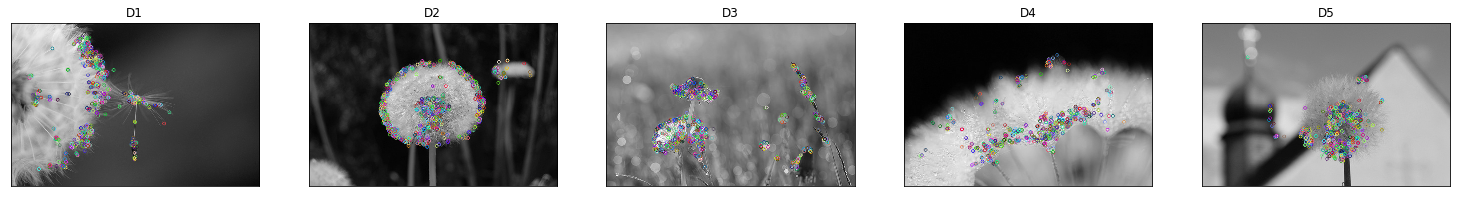

In [90]:
dan1 = Image.fromarray(croppedDandelions[0])
dan2 = Image.fromarray(croppedDandelions[1])
dan3 = Image.fromarray(croppedDandelions[2])
dan4 = Image.fromarray(croppedDandelions[3])
dan5 = Image.fromarray(croppedDandelions[4])

displayDandelions = [dan1, dan2, dan3, dan4, dan5]
titles = ['D1', 'D2', 'D3', 'D4', 'D5']

npDan1 = np.asarray(dan1)
npDan2 = np.asarray(dan2)
npDan3 = np.asarray(dan3)
npDan4 = np.asarray(dan4)
npDan5 = np.asarray(dan5)

orb = cv2.ORB_create(nfeatures = 1000)

kp1, d1 = orb.detectAndCompute(npDan1, None)
kp2, d2 = orb.detectAndCompute(npDan2, None)
kp3, d3 = orb.detectAndCompute(npDan3, None)
kp4, d4 = orb.detectAndCompute(npDan4, None)
kp5, d5 = orb.detectAndCompute(npDan5, None)

kpDan1 = cv2.drawKeypoints(npDan1, kp1, None)
kpDan2 = cv2.drawKeypoints(npDan2, kp2, None)
kpDan3 = cv2.drawKeypoints(npDan3, kp3, None)
kpDan4 = cv2.drawKeypoints(npDan4, kp4, None)
kpDan5 = cv2.drawKeypoints(npDan5, kp5, None)

displayDandelions = [kpDan1, kpDan2, kpDan3, kpDan4, kpDan5]

plt.figure(figsize=(20.4, 13.8))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(1 * 5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(displayDandelions[i], cmap=plt.cm.gray)
    plt.title(titles[i], size=12)
    plt.xticks(())
    plt.yticks(())

Now that we have found the features of the images we will be using, we can then use brute force to attempt to match the keypoints of an image against the keypoints of another image, using the drawMatches function. We can sort the two images' matched pairs, and select the 50 matched keypoint pairs with the smallest distances, as they are the keypoints with the highest confidence. Then we are able to display these two images next to one another with lines connecting their matched pairs, as seen below using the first two images of the croppedDandelion array as an example.

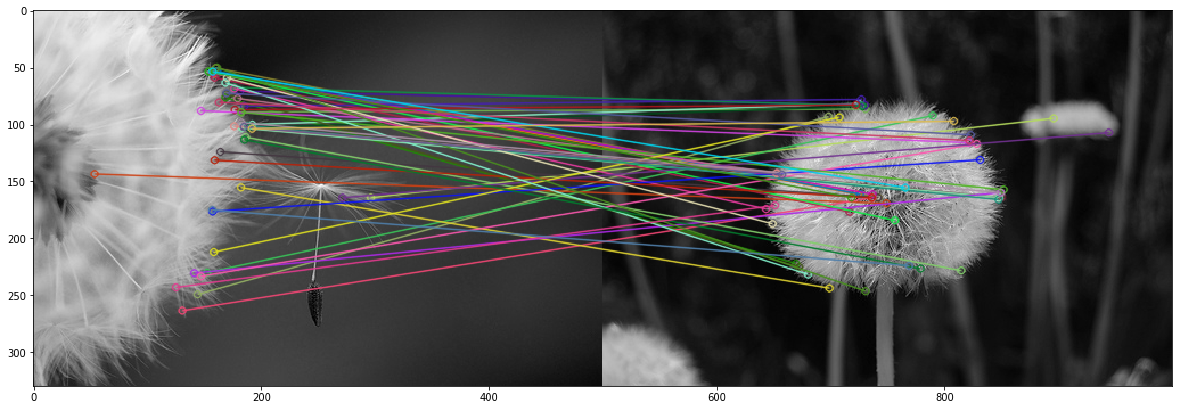

In [91]:
brute = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = brute.match(d1, d2)
matches = sorted(matches, key = lambda x:x.distance)

resultOfMatch = cv2.drawMatches(npDan1, kp1, npDan2, kp2, matches[:50], None, flags=2)
plt.figure(figsize=(20.4, 13.8))
plt.imshow(resultOfMatch)


With this ability to match key points, we want to see how effectively this method can match images of flowers of the same species. We will combine all of our cropped flower images into an array that contains all the species we are working with.

Then we will determine the keypoints and descriptors of each image and store them in arrays with corresponding indices. Next we can compare a specific image in an array against all the other images in the array, determine each pair's matching points again, and sum up the 50 most confident matching pairs. We chose to sum the 50 most confident keypoint pairs for each image pairing, so that we can compare these sums to attempt to find the smallest sum, implying the strongest similarity. All of this functionality is within a function called findMatch, accepting the array of images and the index of the image we want to compare as parameters.

In [92]:
allSpecies = []

for each in croppedRoses:
    allSpecies.append(each)
print("Number of roses: ", len(croppedRoses))

for each in croppedDandelions:
    allSpecies.append(each)
print("Number of dandelions: ", len(croppedDandelions))

for each in croppedSunflowers:
    allSpecies.append(each)
print("Number of sunflowers: ", len(croppedSunflowers))

for each in croppedTulips:
    allSpecies.append(each)
print("Number of tulips: ", len(croppedTulips))

for each in croppedDaisies:
    allSpecies.append(each)
print('Number of daisies: ', len(croppedDaisies))
    

Number of roses:  212
Number of dandelions:  357
Number of sunflowers:  233
Number of tulips:  290
Number of daisies:  213


In [109]:
def findMatch(arr, index, title): 
    kps = []
    ds = []
    matchPairs = []
    drawnPairs = []
    totals = []

    for i in range(0, len(arr)):
        kp, d = orb.detectAndCompute(arr[i], None)
        kps.append(kp)
        ds.append(d)

    i = index
    for j in range(len(arr)):
        if(i != j):
            match = brute.match(ds[i], ds[j])
            match = sorted(match, key = lambda x:x.distance)
            result = cv2.drawMatches(arr[i], kps[i], arr[j], kps[j], match[:50], None, flags=2)

            # sum 50 most confident matches
            total = 0
            for x in range(20):
                total += match[x].distance

            totals.append(total)
            #matchPairs.append(match)
            drawnPairs.append(result)

    closestIdx = 0
    closest = 1000000

    for x in range(len(totals)):
        if closest > totals[x]:
            closest = totals[x]
            closestIdx = x

    plt.figure(figsize=(20.4, 13.8))
    plt.imshow(drawnPairs[closestIdx])
    plt.title(title, size=16)
    plt.xticks(())
    plt.yticks(())


To test how well this works, we tested the first image of each flower species against the remaining images in the array. 


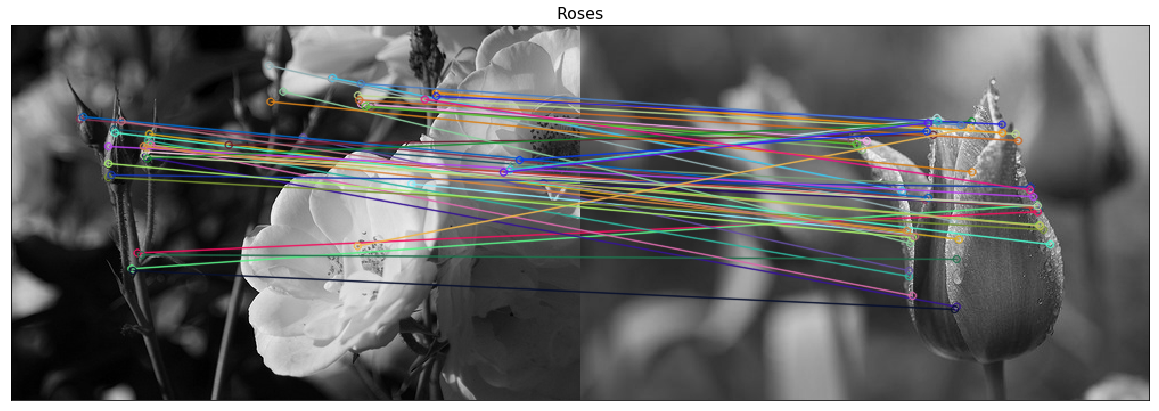

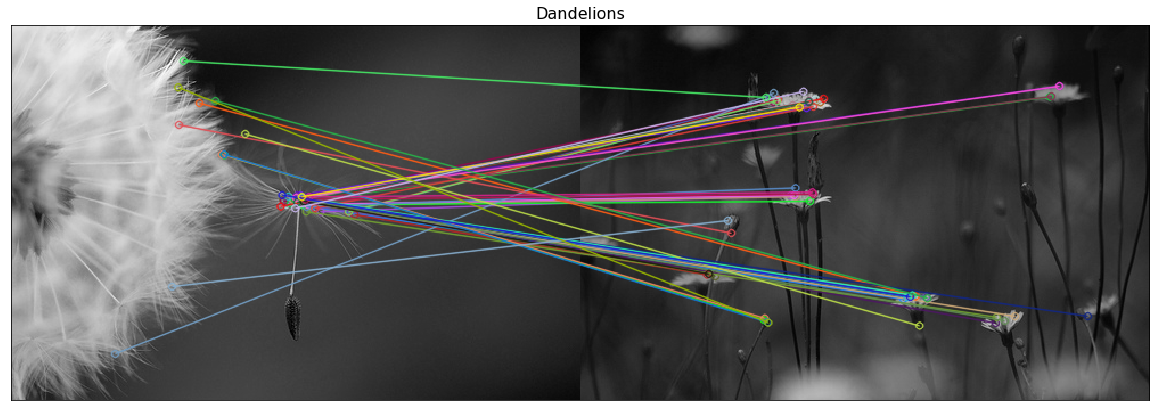

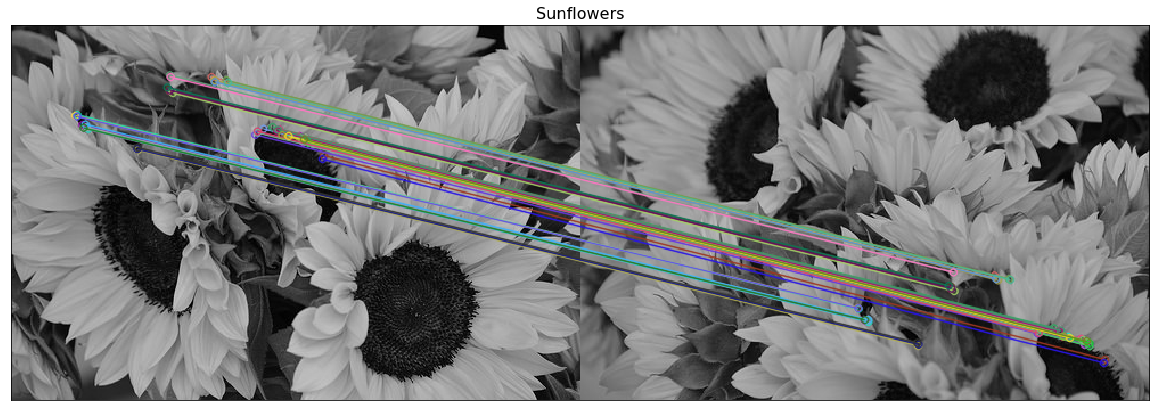

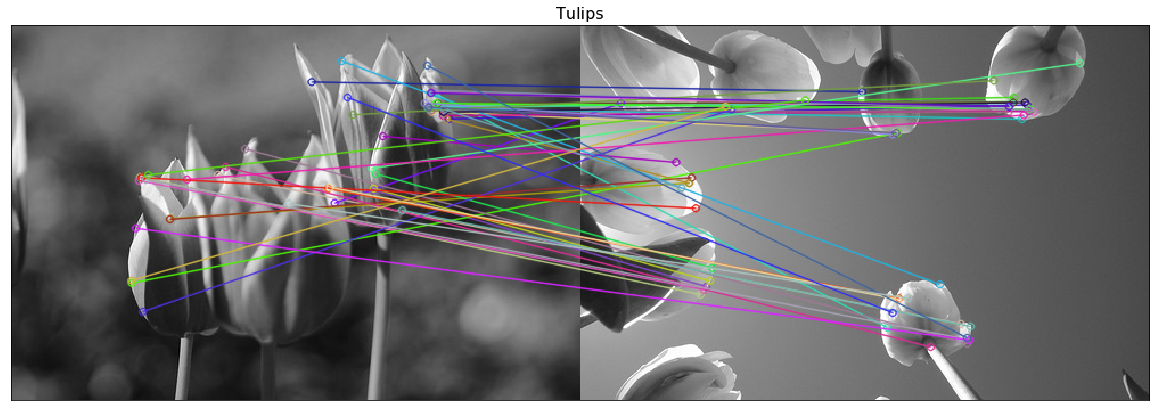

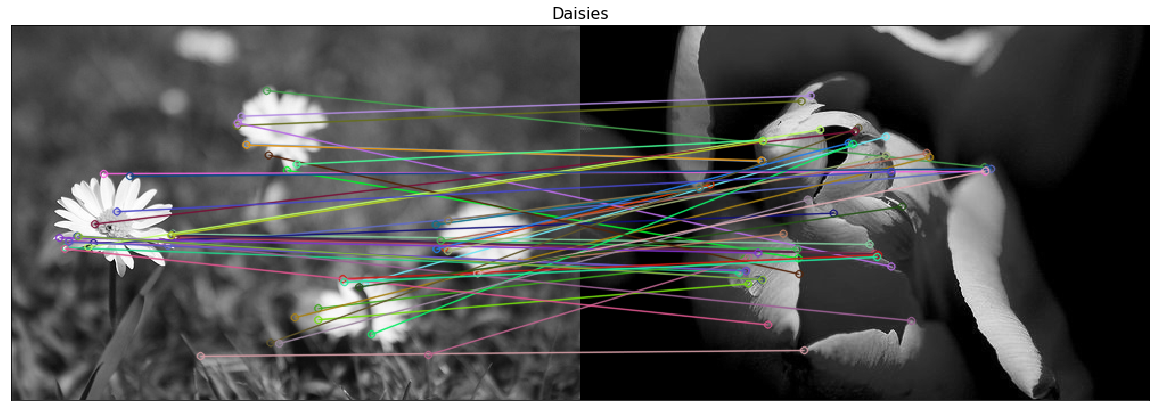

In [110]:
# Find closest match to first rose picture
# Roses
findMatch(allSpecies, 0, 'Roses')
# Dandelions
findMatch(allSpecies, len(croppedRoses), 'Dandelions')
# Sunflowers
findMatch(allSpecies, len(croppedRoses) + len(croppedDandelions), 'Sunflowers')
# Tulips
findMatch(allSpecies, len(croppedRoses) + len(croppedDandelions) + len(croppedSunflowers), 'Tulips')
# Daisies
findMatch(allSpecies, len(croppedRoses) + len(croppedDandelions) + len(croppedSunflowers) + len(croppedTulips), 'Daisies')

As we can see, the tulips and the sunflowers images were successfully matched to other images containing the same flower species. The matching image for the sunflowers, however, is a rotated version of the sunflower image that was being compared. The rose image we tested was matched to an image of a tulip, but the keypoints of the tulip were matched to the keypoints of a rosebud in the picture, which is quite similar in shape to a tulip. There are very few matching key points to the rose itself in the picture. The dandelions were matched to daisies, and the daisies were matched to tulips. It seems that this method can be successful, but is not very dependable. Objects in the background of images can dominate the matching key points, and therefore cause an image to be matched to an otherwise different image, or the method can simply produce incorrect results.